In [16]:
import numpy as np
import torch 

import torch.nn as nn
import matplotlib.pyplot as plt

In [17]:
x=np.loadtxt('ex2x.dat')
y=np.loadtxt('ex2y.dat')

In [18]:
x.shape

(50,)

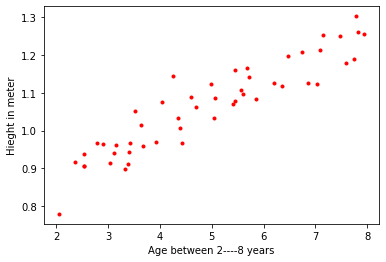

In [19]:
plt.plot(x,y,'r.')
plt.xlabel("Age between 2----8 years")
plt.ylabel("Hieght in meter")
plt.show()

In [20]:
ones=np.ones([x.shape[0],1])
x=x.reshape(x.shape[0],1)
x=np.concatenate((ones,x),axis=1)

In [21]:
x

array([[1.       , 2.0658746],
       [1.       , 2.3684087],
       [1.       , 2.5399929],
       [1.       , 2.5420804],
       [1.       , 2.549079 ],
       [1.       , 2.7866882],
       [1.       , 2.9116825],
       [1.       , 3.035627 ],
       [1.       , 3.1146696],
       [1.       , 3.1582389],
       [1.       , 3.3275944],
       [1.       , 3.3793165],
       [1.       , 3.4122006],
       [1.       , 3.4215823],
       [1.       , 3.5315732],
       [1.       , 3.6393002],
       [1.       , 3.6732537],
       [1.       , 3.9256462],
       [1.       , 4.0498646],
       [1.       , 4.2483348],
       [1.       , 4.3440052],
       [1.       , 4.3826531],
       [1.       , 4.4230602],
       [1.       , 4.6102443],
       [1.       , 4.6881183],
       [1.       , 4.9777333],
       [1.       , 5.0359967],
       [1.       , 5.0684536],
       [1.       , 5.4161491],
       [1.       , 5.4395623],
       [1.       , 5.4563207],
       [1.       , 5.5698458],
       [

In [22]:
X=torch.from_numpy(x.astype(np.float32))
Y=torch.from_numpy(y.astype(np.float32))
Y=Y.view(Y.shape[0],1)
X.unsqueeze_(1)
Y.unsqueeze_(1)

tensor([[[0.7792]],

        [[0.9160]],

        [[0.9054]],

        [[0.9057]],

        [[0.9390]],

        [[0.9668]],

        [[0.9644]],

        [[0.9145]],

        [[0.9393]],

        [[0.9607]],

        [[0.8984]],

        [[0.9121]],

        [[0.9424]],

        [[0.9662]],

        [[1.0526]],

        [[1.0144]],

        [[0.9597]],

        [[0.9685]],

        [[1.0766]],

        [[1.1455]],

        [[1.0341]],

        [[1.0070]],

        [[0.9668]],

        [[1.0896]],

        [[1.0634]],

        [[1.1237]],

        [[1.0323]],

        [[1.0874]],

        [[1.0703]],

        [[1.1606]],

        [[1.0778]],

        [[1.1070]],

        [[1.0972]],

        [[1.1649]],

        [[1.1412]],

        [[1.0844]],

        [[1.1252]],

        [[1.1168]],

        [[1.1971]],

        [[1.2069]],

        [[1.1251]],

        [[1.1236]],

        [[1.2133]],

        [[1.2523]],

        [[1.2497]],

        [[1.1800]],

        [[1.1897]],

        [[1.3

In [35]:
output_size=1
input_size=2
print(input_size)

2


In [36]:
#model creation
model=nn.Linear(input_size,output_size)

In [37]:
#loss function
loss=nn.MSELoss()

In [38]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [39]:
#now traing loop
los=[]
iterations=10
for epoch in range(iterations):
    y_pred=model(X)
    l=loss(Y,y_pred)
    los.append(l)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 1==0:
        [w1,w2]=model.parameters()
        print(f'epoch{epoch+1}: w={w1[0][0].item():.3f},loss={l:.3f}')

epoch1: w=0.472,loss=0.883
epoch2: w=0.465,loss=0.159
epoch3: w=0.462,loss=0.031
epoch4: w=0.461,loss=0.008
epoch5: w=0.460,loss=0.004
epoch6: w=0.460,loss=0.003
epoch7: w=0.460,loss=0.003
epoch8: w=0.461,loss=0.003
epoch9: w=0.461,loss=0.003
epoch10: w=0.461,loss=0.003


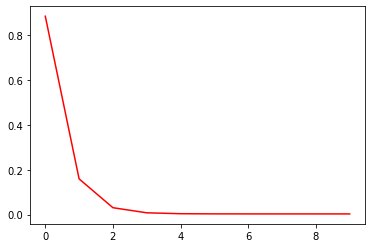

In [40]:
with torch.no_grad():
    plt.plot(los,'r')
    
    plt.show()

In [41]:
 [w1,w2]=model.parameters()

In [42]:
w1

Parameter containing:
tensor([[0.4611, 0.0836]], requires_grad=True)

In [43]:
w2

Parameter containing:
tensor([0.1813], requires_grad=True)